# 2A.soft - IPython et commandes magiques - correction

Aperçu des [commandes magiques](http://ipython.readthedocs.io/en/stable/config/custommagics.html) pour automatiser un peu plus les tâches courantes.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

### Exercice 1 : votre propre magique commande

On implémente la commande ``%monplot`` qui prend un fichier texte, appelle la commande [plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html) et stocke le résultat dans la variable ``df`` qui est ajoutée à l'espace de travail.

In [3]:
from IPython.core.magic import Magics, magics_class, line_magic, cell_magic, line_cell_magic
import pandas
 
@magics_class
class CustomMagics(Magics):
 
    @line_magic
    def monplot(self, line):
        df = pandas.read_csv(line, sep="\t")
        pl = df.plot()
        if self.shell is not None:
            self.shell.user_ns["df"] = df
            
ip = get_ipython()
ip.register_magics(CustomMagics)            

In [4]:
import pyensae
pyensae.download_data("marathon.txt")

    downloading of  http://www.xavierdupre.fr/enseignement/complements/marathon.txt  to  marathon.txt


'marathon.txt'

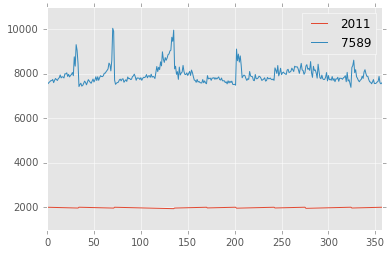

In [5]:
%monplot marathon.txt

Sans prétraitement, cela n'a pas toujours un sens. Mais cela devient pratique dès qu'il faut automatiser la création d'un rapport à partir de données qui se présentent toujours sous le même format. D'une manière générale, cela revient à réduire la syntaxe des tâches répétitives.